In [75]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [76]:
class Perceptron(object):
    def __init__(self, input_size, lr=1, max_iter=100):
        self.W = np.zeros(input_size+1)
        self.epochs = max_iter
        self.lr = lr
    
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
        # sig = 1 / (1 + math.exp(-x))
        # return sig
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
    def fit(self, X, d,error,accuracy):
        for _ in range(self.epochs):
            acc=[]
            ylist=[]
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x
                b=int(d[i]==y)
                acc.append(b)
                ylist.append(y)
            count=0
            for i in acc:
                count=count+i
            score=count/len(acc)
            err=mean_absolute_error(d, ylist)
            error.append(err)
            accuracy.append(score)
            

In [77]:
df = pd.read_csv('sample_data/mnist_train_small.csv')
X_train, y_train = df.drop('5', axis=1), df['5']
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
from sklearn.neural_network import MLPClassifier
test = pd.read_csv('sample_data/mnist_test.csv')
X_test, y_test = test.drop('7', axis=1), test['7']
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
from sklearn import datasets
X, y = datasets.load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# print(X_test[0])


In [78]:
max_iter= 30
error = []
accuracy=[]
clf=Perceptron(input_size=784,max_iter=1)

clf = MLPClassifier(hidden_layer_sizes=(300, 100, 10), solver="sgd", random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


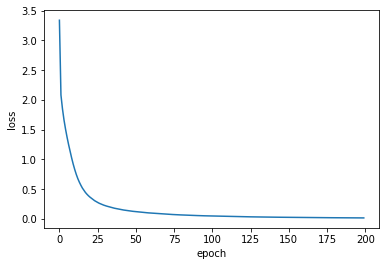

In [79]:
plt.plot(range(clf.n_iter_), clf.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()